# Workflow for Python Assignment

## 1. Document Dr. X's Code! 

### Set-up

In [1]:
from Bio import SeqIO #from Biopython, import SeqIO, which is the standard Sequence Input/Output interface 
from Bio.Data import CodonTable #from the data package, import CodonTable, which can return tables of codons
import pandas as pd #import pandas to work with dataframes in python

### Function

In [2]:
#This code defines a function called get_sequences_from_file that takes a file in fasta format and populates a dictionary with the species name (the keys) and the corresponding sequence (the values)

def get_sequences_from_file(fasta_fn): #define a function entitled "get_sequences_from_file" using the argument fasta_fn, which should be a file in fasta format 
    sequence_data_dict = {} #create an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #SeqIO.parse is a function that takes a file (fasta_fn) and a format (fasta) and returns a SeqRecord iterator, which is an object used in Biopython to hold a sequence 
        description = record.description.split() #description is a variable that holds each record in fasta_fn with the string of descriptors and sequence (ex: Ursus americanus ACGT) with the sequence description split into words by .description.split so that we can access individual parts of the string
        species_name = description[1] + " " + description[2] #species_name is a variable that takes the word after the SeqRecord (ex:Ursus; the second word in the variable 'description') and puts a space and then the following word (spelaeus) to form the species name
        sequence_data_dict[species_name] = record.seq #specifies that the species_name for the dictionary is the key by which you can access the corresponding sequence and is the record ID
    return(sequence_data_dict) #return the created dictionary

### Test of the function

In [3]:
#Example of a run of the function to ensure it works
bears = get_sequences_from_file("bears_cytb.fasta")
print(bears)

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()), 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()), 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()), 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()), 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()), 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()), 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()), 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()), 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA', Sin

In [4]:
#Check that keys for the created dictionary are the Species Names
bears.keys()

dict_keys(['Ursus spelaeus', 'Ursus arctos', 'Ursus thibetanus', 'Melursus ursinus', 'Ursus americanus', 'Helarctos malayanus', 'Ailuropoda melanoleuca', 'Tremarctos ornatus', 'Ursus maritimus'])

## 2. My String Translate Function!

### Set-up

In [5]:
#sample file with string of nucleotides from a mitochondrial sequence
with open('string_nucleotides.txt', 'r') as myfile:
    sample=myfile.read()
print(sample)

CCCCTTCATGATCCTAGCCCTATGAGGCATTGTAATAACCAGCTCCATCTGCATACGACAAACAGACCTAAAATCACTAATCGCTTACTCCTCAGTAAGCCACATAGGCCTGGTCACCACCGCATGCCTAATCCAAACCCCATGAAGCATCACCGGAGCCATAATCCTAATAATCGCCCACGGCCTAACATCCTCCATACTATTCTGCCTAGCCAACACCAACTACGAACGGACCCATACTCGAACCCTAATTCTGGCACGAGGCCTCCAAACCATCCTCCCACTGATAGCGTCCTGATGACTCCTTGCCAACTTGACAAACATGGCACTCCCCCCAACCATCAACCTAATAGGAGAACTTATAATTATCTCCGCCCTCTTTAACTGATCAACTCCAACAATTATCCTAACGGGCCTGGGAACCTTAATCACAGCAATCTATTCACTACACATATTCCTAATAACACAACGAAACAAACTCCCACTCCACATAACCATGATAAACCCAACACACACCCGAGAACACCTAATCATAGCCCTACACATGCTACCACTCACCATACTAATCATAAAACCCACCCTCATTTCAAGCATATTACCCTGTTAGCATAGTTTAATAAAAACACTAGGACGTGGCCCTAAAAACAGAAGTTTAACCCTTCTTGCAAACCGAGAGGTGTTCAGAACA


In [6]:
#Check out the codon table
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #returns a simple text representation of the codon table
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

### Function 

In [7]:
#This function takes a string of nucleotides and specified stop codons as an argument and outputs the sequence translated into amino acids as a string

from itertools import takewhile #takewhile allows you to specify that you want to take codons unless they fit a certain criteria (e.g. stop codon), then the code breaks
def string_translate(string_nucleotides, stop_codons = ('TAA', 'TAG', 'AGA', 'AGG')): #defines a function called string_translate that takes two arguments: the file and the specified stop codons
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #returns a simple text representation of the codon table
    codon = [string_nucleotides[i:i+3] for i in range(0, len(string_nucleotides), 3)] #for loop over all nucleotides (i) through the length of the nucleotide string starting with position zero with a step size of 3 and defines that a codon is three nucleotides [i:i+3] 
    coding_sequence  =  takewhile(lambda x: x not in stop_codons, codon) #loops through the codons in the codon variable and keeps every codon until it finds one that is a stop codon, then it stops
    protein_sequence = ''.join([mito_table.forward_table[codon] for codon in coding_sequence]) #loops over the codons in coding_sequence, classifies each codon into an amino acid using the codon table, and joins the amino acids one by one to a string called protein_sequence
    return(protein_sequence) #outputs the amino acids as a string

### Test of the Function

In [8]:
#try out my new function with the sample sequence from before
string_translate(sample, stop_codons = ('TAA', 'TAG', 'AGA', 'AGG'))

'PLHDPSPM'

In [9]:
#verify that the output is a string
type(string_translate(sample, stop_codons = ('TAA', 'TAG', 'AGA', 'AGG')))

str

## 3. My Alternative Function! 

### Set-up

In [10]:
from Bio.Seq import Seq #seq is an object that can be read by existing biopython functions
from Bio.Alphabet import IUPAC #loads an existing alphabet for DNA, RNA, and protein sequences

### Function

In [11]:
#This function uses existing features of BioPython: the argument input is the nucleotide string and the output is a Bio.Seq.Seq object containing the amino acid string corresponding to the nucleotide string

def alternative_string_translate(string_nucleotides): #defines the function alternative_string_translate that takes a string of nucleotides as the argument
    coding_dna = Seq(string_nucleotides, IUPAC.ambiguous_dna) #creates a variable that contains a seq object made from the nucleotide string with the IUPAC.ambiguous_dna alphabet 
    return coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True) #return the amino acid string corresponding to the nucleotide string using the existing BioPython '.translate' function and the Vertebrate Mitochondrial table translations, stopping when the code reaches a stop codon 

### Test the Function

In [12]:
alternative_string_translate(sample)

/Users/jessicajudson/anaconda/lib/python3.6/site-packages/Bio/Seq.py:2071: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Seq('PLHDPSPM', ExtendedIUPACProtein())

In [13]:
#verify that the output is a Bio.Seq.Seq object
type(alternative_string_translate(sample))

/Users/jessicajudson/anaconda/lib/python3.6/site-packages/Bio/Seq.py:2071: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Bio.Seq.Seq

## 4. My Count Amino Acid Function

### Set-up

In [14]:
#variable to test with first string_translate function
sampleaa = string_translate(sample, stop_codons = ('TAA', 'TAG', 'AGA', 'AGG'))

In [15]:
#variable to test with alternative string_translate function
samplebb = alternative_string_translate(sample)

/Users/jessicajudson/anaconda/lib/python3.6/site-packages/Bio/Seq.py:2071: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


### Function

In [16]:
#define the groups of "residues" or amino acid types
charged = ['R','K','D','E']
polar = ['Q','N','H','S','T','Y','C','M','W']
hydrophobic = ['A','I','L','F','V','P','G']

In [17]:
#Function that takes the amino acid sequence and the residue group (e.g. charged, polar, hydrophobic) as arguments and 
#outputs the proportion of amino acids in the sequence belonging to each residue group

def get_proportion_aa(aa_seq, residues): #define the function, taking the amino acid sequence and the residues as arguments
    count = 0 #set the initial count to zero
    for aa in aa_seq: #for loop over each amino acid in the sequence
        if aa in residues: #if the amino acid in the sequence matches one in the specified residue,
            count += 1 #add one to the count
    return count/len(aa_seq) #return the count of matching amino acids to the residue group divided by the total number of amino acids in the sequence

### Test the Function

In [18]:
#sampleaa is a string: 'PLHDPSPM'
#define variables for each proportion and print
charged_number = get_proportion_aa(sampleaa, charged) #call the function, give the string and the residue arguments
polar_number = get_proportion_aa(sampleaa, polar)
hydrophobic_number = get_proportion_aa(sampleaa, hydrophobic)
print(charged_number, polar_number, hydrophobic_number) #print the outputs

0.125 0.375 0.5


In [19]:
#samplebb is a Bio.Seq.Seq object: Seq('PLHDPSPM', ExtendedIUPACProtein())
charged_2 = get_proportion_aa(samplebb, charged)
polar_2 = get_proportion_aa(samplebb, polar)
hydrophobic_2 = get_proportion_aa(samplebb, hydrophobic)
print(charged_2, polar_2, hydrophobic_2)

0.125 0.375 0.5


## 5. Translate and Proportion of Amino Acid Combined Function

### Set-up

In [20]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") #run the function from part 1 on the fasta file

bear_df = pd.read_csv("bears_data.csv") # Includes only data for body mass currently and empty cells for other columns
species_list = list(bear_df.species)

In [21]:
print(bear_df) #look at the existing data table

                  species     mass  charged  polar  hydrophobic
0          Ursus spelaeus  550.800      NaN    NaN          NaN
1            Ursus arctos  203.500      NaN    NaN          NaN
2        Ursus thibetanus   99.714      NaN    NaN          NaN
3        Melursus ursinus  100.030      NaN    NaN          NaN
4        Ursus americanus  110.560      NaN    NaN          NaN
5     Helarctos malayanus   47.020      NaN    NaN          NaN
6  Ailuropoda melanoleuca  118.200      NaN    NaN          NaN
7      Tremarctos ornatus  140.700      NaN    NaN          NaN
8         Ursus maritimus  425.100      NaN    NaN          NaN


### Function

In [22]:
#This function takes a specific key (a species) from the sequence_data_dict created in the get_sequences_from_file function
#as an argument and outputs the proportion of each amino acid type for that particular species

def combined_function(x, sample_dict): #define the function
    translate = alternative_string_translate(str(sample_dict[x])) #call the alternative_string_translate function on the sequence associated with the key in the dictionary, forcing it to be a string so that the function can read the sequence
    proportion_charged = get_proportion_aa(translate, charged) #call the get_proportion_aa function on the translated sequence and with the desired residues
    proportion_polar = get_proportion_aa(translate, polar)
    proportion_hydrophobic = get_proportion_aa(translate, hydrophobic)
    return proportion_charged, proportion_polar, proportion_hydrophobic #return the proportion of each amino acid type for the sequence associated with the specified key

In [23]:
#This part of the code specifies that for three columns of bear_df that we want to be filled, we will run the combined_function
#on all of the sequences associated with the keys ('species') in the cytb_seqs dictionary, create a pd.Series (a list of the outputs of the combined_function corresponding to
#all of the sequences in the cytb_seqs variable, specifying that the axis is 1 to indicate that I am interested in filling the columns), and add that series to the columns in bear_df 
#matching species names to keys using "lambda row" to fill each species row with the info for the charged, polar, and hydrophobic categories

bear_df[['charged', 'polar', 'hydrophobic']] = bear_df.apply(lambda row: pd.Series(combined_function(row['species'], cytb_seqs)), axis = 1)

### Output

In [24]:
print(bear_df)

                  species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836
1            Ursus arctos  203.500  0.092348  0.324538     0.583113
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.089710  0.337731     0.572559
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475


## 6. Bar Chart of Mass by Species

### Set-up

In [25]:
%matplotlib inline
from ggplot import *

In [26]:
print(bear_df)

                  species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836
1            Ursus arctos  203.500  0.092348  0.324538     0.583113
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.089710  0.337731     0.572559
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475


### Graph Method #1: Pandas

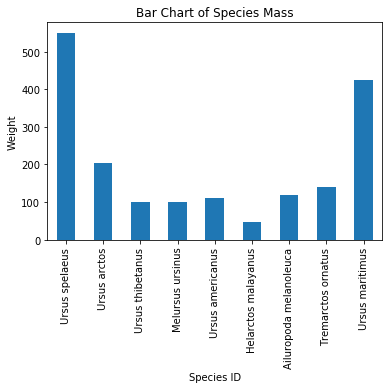

In [27]:
#This code is to plot species vs. weight using pandas:

bear_weight = bear_df.plot(x = 'species', y = 'mass', kind='bar', legend = False, title = "Bar Chart of Species Mass")
#specify x and y, that it's a bar chart, that I don't want a legend, specify the title
bear_weight.set_xlabel("Species ID") #set x-axis label
bear_weight.set_ylabel("Weight") #set y-axis label

### Graph Method #2: Seaborn

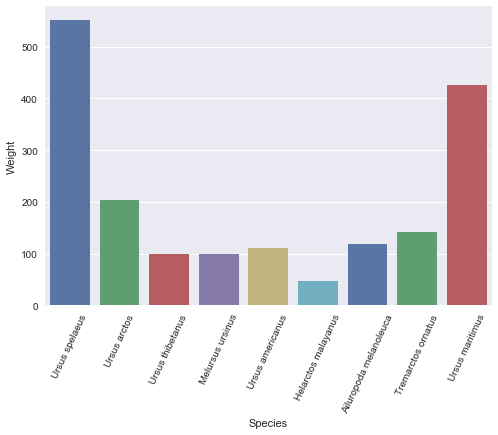

In [28]:
#to graph the same thing using seaborn
import seaborn as sns
sea_bear_weight = sns.barplot(x = 'species', y = 'mass', data=bear_df, palette="deep") #specify x, y, data, and color palette 
sea_bear_weight.set(xlabel='Species', ylabel='Weight') #label axes
for item in sea_bear_weight.get_xticklabels(): #set rotation of x-axis labels
    item.set_rotation(65)

### Graph Description

The largest bear species is Ursus spelaeus. Interestingly, this species, called the cave bear, 
went extinct about 24000 years ago.

## 7. Proportion of Amino Acid for each Species

### Graph Method #1: Pandas

In [29]:
#create a new dataframe without the mass column
new_bear = bear_df[['species', 'charged', 'polar', 'hydrophobic']]
print(new_bear)

                  species   charged     polar  hydrophobic
0          Ursus spelaeus  0.092348  0.329815     0.577836
1            Ursus arctos  0.092348  0.324538     0.583113
2        Ursus thibetanus  0.092348  0.327177     0.580475
3        Melursus ursinus  0.089710  0.340369     0.569921
4        Ursus americanus  0.089710  0.337731     0.572559
5     Helarctos malayanus  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  0.089710  0.343008     0.567282
7      Tremarctos ornatus  0.089710  0.335092     0.575198
8         Ursus maritimus  0.092348  0.327177     0.580475


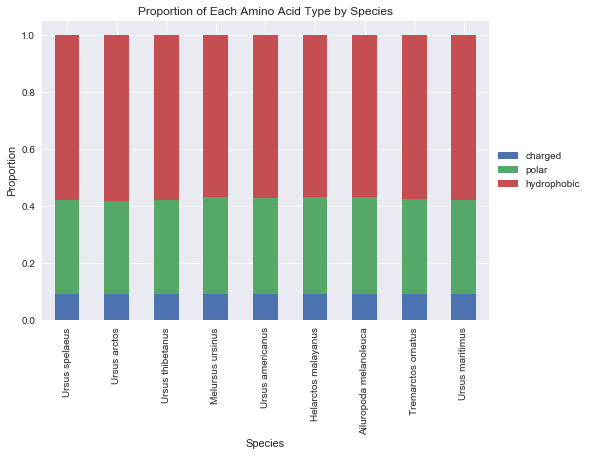

In [30]:
#create a stacked bar plot
#use species as the x value, and specify that the other column values are stacked, give the graph a title
pandas_plot = new_bear.plot(x = 'species', kind='bar',stacked=True,title="Proportion of Each Amino Acid Type by Species")
pandas_plot.set_ylabel("Proportion") #set y-axis label
pandas_plot.set_xlabel("Species") #set x-axis label
pandas_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #change the location of the legend to outside the graph

### Graph Method #2: Bokeh

In [31]:
#import the needed tools from bokeh
from bokeh.charts import Bar, output_file, show #bar chart utilities
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend

In [32]:
#allow bokeh to display in jupyter notebook
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

Loading BokehJS ...

In [33]:
#create a variable that holds a stacked bar chart for the bear_df dataframe
proportions = Bar(bear_df,
          values=blend('charged', 'polar', 'hydrophobic', name='Proportions', labels_name='proportion'), #specify the three parts of the stacked bar and name the y axis
          label=cat(columns='species', sort=False), #specify that the x axis is species
          stack=cat(columns='proportion', sort=False), #specify stacking of the aforementioned columns
          color=color(columns='proportion', palette=['aqua', 'chartreuse', 'deeppink'], #give a color palette
                      sort=False),
          legend='top_right', #specify legend location
          title="Proportion of Amino Acid Types by Species") #give it a title

In [34]:
show(proportions)

### Graph Description

These graphs show that the content of cytochrome b with respect to amino acids is very similar across species.

## 8. Save dataframe to a csv file

In [35]:
bear_df.to_csv('bears_mass_cytb.csv', index=False) #index=False gets rid of the row numbers

## 9. Bonus calculations:

In [36]:
## 9. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. 
print(bear_df.polar.median())
print(bear_df.hydrophobic.mean())
print(bear_df.charged.max())

0.33509234828496043
0.5749047200234535
0.0923482849604


# Program Documentation!
http://biopython.org/wiki/Biopython  
http://biopython.org/wiki/SeqIO  
http://biopython.org/DIST/docs/api/Bio.Data.CodonTable-pysrc.html  
http://pandas.pydata.org/  
https://docs.python.org/2/library/itertools.html  
http://biopython.org/wiki/Seq  
http://biopython.org/DIST/docs/api/Bio.Alphabet.IUPAC-module.html  
https://seaborn.pydata.org/  
http://bokeh.pydata.org/en/latest/

# My repository! 
Name of Repository: **EEOB546X**  
**URL: https://github.com/jjudson28/EEOB546X**